In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

DATA CLEANING/ SET UP

In [2]:
# Retrieve file path
file_path = Path('listings.csv')
# Read csv
airbnb_df = pd.read_csv(file_path)
# Display dataframe
airbnb_df

,id,name,num_bedrooms,bedroom_type,num_of_beds,num_of_bathrooms,bathroom_type,host_name,neighbourhood_group,neighbourhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,51864768.0,Hotel in New York,1,bedroom,2,1.0,private,Millennium Broadway,Manhattan,Theater District,...,Private room,185,1,761,1/5/2024,27.88,6,0,463,Exempt
1,35545434.0,Boutique hotel in New York,1,bedroom,1,1.0,private,Chelsea Inn Hotel,Manhattan,Chelsea,...,Private room,145,1,717,1/5/2024,14.61,5,0,90,Exempt
2,51864614.0,Hotel in New York,1,bedroom,1,1.0,private,Millennium Broadway,Manhattan,Theater District,...,Private room,153,1,341,1/5/2024,12.18,6,0,292,Exempt
3,54068618.0,Condo in New York,1,bedroom,1,1.0,shared,Trenton,Manhattan,East Harlem,...,Private room,60,1,132,1/5/2024,5.40,1,216,70,OSE-STRREG-0000691
4,29831517.0,Home in Brooklyn,1,bedroom,1,1.0,private,Rena,Brooklyn,Canarsie,...,Private room,71,2,325,1/5/2024,5.25,1,136,62,OSE-STRREG-0000173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20144,403712.0,Rental unit in New York,1,bedroom,1,1.0,bath,Giovanni,Manhattan,East Village,...,Entire home/apt,300,30,6,10/29/2012,0.04,1,0,0,NaN
20145,75658.0,Loft in Brooklyn,1,bedroom,1,1.0,shared,Noemi,Brooklyn,Bedford-Stuyvesant,...,Private room,221,30,20,9/30/2012,0.13,1,364,0,NaN
20146,513343.0,Rental unit in Brooklyn,1,bedroom,2,1.0,bath,Dennis,Brooklyn,Prospect Heights,...,Entire home/apt,125,30,1,7/11/2012,0.01,1,298,0,NaN
20147,456578.0,Rental unit in New York,1,bedroom,1,1.0,shared,Helen,Manhattan,Washington Heights,...,Private room,100,30,1,6/1/2012,0.01,1,87,0,NaN


In [3]:
# Fix spelling errors
airbnb_df = airbnb_df.rename(columns={'neighbourhood_group': 'neighborhood_group',
                          'neighbourhood': 'neighborhood'})
airbnb_df.head()

,id,name,num_bedrooms,bedroom_type,num_of_beds,num_of_bathrooms,bathroom_type,host_name,neighborhood_group,neighborhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,51864768.0,Hotel in New York,1,bedroom,2,1.0,private,Millennium Broadway,Manhattan,Theater District,...,Private room,185,1,761,1/5/2024,27.88,6,0,463,Exempt
1,35545434.0,Boutique hotel in New York,1,bedroom,1,1.0,private,Chelsea Inn Hotel,Manhattan,Chelsea,...,Private room,145,1,717,1/5/2024,14.61,5,0,90,Exempt
2,51864614.0,Hotel in New York,1,bedroom,1,1.0,private,Millennium Broadway,Manhattan,Theater District,...,Private room,153,1,341,1/5/2024,12.18,6,0,292,Exempt
3,54068618.0,Condo in New York,1,bedroom,1,1.0,shared,Trenton,Manhattan,East Harlem,...,Private room,60,1,132,1/5/2024,5.40,1,216,70,OSE-STRREG-0000691
4,29831517.0,Home in Brooklyn,1,bedroom,1,1.0,private,Rena,Brooklyn,Canarsie,...,Private room,71,2,325,1/5/2024,5.25,1,136,62,OSE-STRREG-0000173


In [4]:
# Retrieve bathroom type data
bath_type = airbnb_df['bathroom_type']
bath_type.head()

0    private
1    private
2    private
3     shared
4    private
Name: bathroom_type, dtype: object

In [5]:
# Retrieve bedroom type data
bed_type = airbnb_df['bedroom_type']
bed_type.head()

0    bedroom
1    bedroom
2    bedroom
3    bedroom
4    bedroom
Name: bedroom_type, dtype: object

In [6]:
# Retrieve number of beds data
num_of_beds = airbnb_df['num_of_beds']
num_of_beds.head()

0    2
1    1
2    1
3    1
4    1
Name: num_of_beds, dtype: int64

In [7]:
# Retrieve number of bedrooms data
num_bedrooms = airbnb_df['num_bedrooms']
num_bedrooms.head()

0    1
1    1
2    1
3    1
4    1
Name: num_bedrooms, dtype: int64

In [8]:
# Retrieve number of bathrooms data
num_bathrooms = airbnb_df['num_of_bathrooms']
num_bedrooms.head()

0    1
1    1
2    1
3    1
4    1
Name: num_bedrooms, dtype: int64

In [9]:
# Retrieve neighborhood group data
neighborhood_group = airbnb_df['neighborhood_group']
neighborhood_group.head()

0    Manhattan
1    Manhattan
2    Manhattan
3    Manhattan
4     Brooklyn
Name: neighborhood_group, dtype: object

In [10]:
# Retrieve neghborhood data
neighborhood = airbnb_df['neighborhood']
neighborhood.head()

0    Theater District
1             Chelsea
2    Theater District
3         East Harlem
4            Canarsie
Name: neighborhood, dtype: object

In [11]:
# Retrieve room type data
room_type = airbnb_df['room_type']
room_type.head()

0    Private room
1    Private room
2    Private room
3    Private room
4    Private room
Name: room_type, dtype: object

In [12]:
# Retrieve price data
price = airbnb_df['price']
price.head()

0    185
1    145
2    153
3     60
4     71
Name: price, dtype: int64

In [13]:
# Retrieve minimum nights data
min_nights = airbnb_df['minimum_nights']
min_nights.head()

0    1
1    1
2    1
3    1
4    2
Name: minimum_nights, dtype: int64

In [14]:
# Retrieve number of reviews data
num_of_reviews = airbnb_df['number_of_reviews']
num_of_reviews.head()

0    761
1    717
2    341
3    132
4    325
Name: number_of_reviews, dtype: int64

In [15]:
room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [16]:
Shared_Room = []
Hotel_Room = []
Homes_or_Apartments = []
Private_Rooms = []

for place in room_type:
    if place == 'Private room':
        Private_Rooms.append(place)
    elif place == 'Hotel room':
        Hotel_Room.append(place)
    elif place == 'Entire home/apt':
        Homes_or_Apartments.append(place)
    elif place == 'Shared room':
        Shared_Room.append(place)


In [17]:
private_rooms = len(Private_Rooms)
hotel_room = len(Hotel_Room)
homes_or_apartments = len(Homes_or_Apartments)
shared_room = len(Shared_Room)

list_of_values = [private_rooms, hotel_room, homes_or_apartments, shared_room]
list_of_values

[8473, 112, 11284, 280]

In [18]:
airbnb_df


,id,name,num_bedrooms,bedroom_type,num_of_beds,num_of_bathrooms,bathroom_type,host_name,neighborhood_group,neighborhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,51864768.0,Hotel in New York,1,bedroom,2,1.0,private,Millennium Broadway,Manhattan,Theater District,...,Private room,185,1,761,1/5/2024,27.88,6,0,463,Exempt
1,35545434.0,Boutique hotel in New York,1,bedroom,1,1.0,private,Chelsea Inn Hotel,Manhattan,Chelsea,...,Private room,145,1,717,1/5/2024,14.61,5,0,90,Exempt
2,51864614.0,Hotel in New York,1,bedroom,1,1.0,private,Millennium Broadway,Manhattan,Theater District,...,Private room,153,1,341,1/5/2024,12.18,6,0,292,Exempt
3,54068618.0,Condo in New York,1,bedroom,1,1.0,shared,Trenton,Manhattan,East Harlem,...,Private room,60,1,132,1/5/2024,5.40,1,216,70,OSE-STRREG-0000691
4,29831517.0,Home in Brooklyn,1,bedroom,1,1.0,private,Rena,Brooklyn,Canarsie,...,Private room,71,2,325,1/5/2024,5.25,1,136,62,OSE-STRREG-0000173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20144,403712.0,Rental unit in New York,1,bedroom,1,1.0,bath,Giovanni,Manhattan,East Village,...,Entire home/apt,300,30,6,10/29/2012,0.04,1,0,0,NaN
20145,75658.0,Loft in Brooklyn,1,bedroom,1,1.0,shared,Noemi,Brooklyn,Bedford-Stuyvesant,...,Private room,221,30,20,9/30/2012,0.13,1,364,0,NaN
20146,513343.0,Rental unit in Brooklyn,1,bedroom,2,1.0,bath,Dennis,Brooklyn,Prospect Heights,...,Entire home/apt,125,30,1,7/11/2012,0.01,1,298,0,NaN
20147,456578.0,Rental unit in New York,1,bedroom,1,1.0,shared,Helen,Manhattan,Washington Heights,...,Private room,100,30,1,6/1/2012,0.01,1,87,0,NaN


BATHROOM TYPE ANALYSIS

In [19]:
room_types = airbnb_df['room_type'].unique()
room_types

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [20]:
bathroom_type = airbnb_df['bathroom_type'].unique()
bathroom_type

array(['private', 'shared', 'bath', 'baths'], dtype=object)

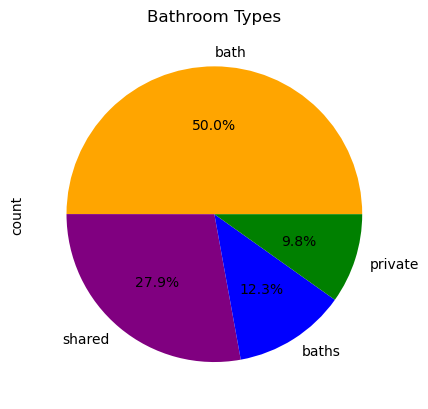

<Figure size 640x480 with 0 Axes>

In [21]:
#BATHROOM TYPE PIE CHART
colors = ['orange', 'purple', 'blue', 'green']
bathroom_type = airbnb_df["bathroom_type"].value_counts()
bathroom_type.plot(kind="pie",autopct="%1.1f%%", colors=colors)
plt.title("Bathroom Types")
plt.show()
plt.savefig("Airbnb_Bathroom_Types_Pie_Chart.png", transparent=True) 

ROOM TYPE ANALYSIS

In [22]:
sizes = list_of_values

labels = ['Private Rooms', 'Hotel Rooms', 'Homes or Apartments', 'Shared Rooms']

colors = ['orange', 'purple', 'blue', 'green']

explode = (0.1, 0.1, 0.1, 0.1)

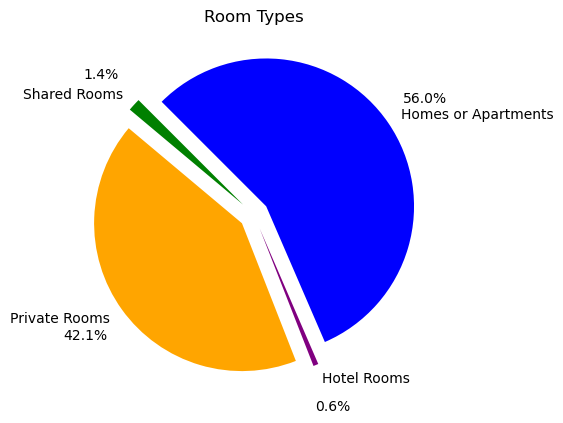

In [23]:
#ROOM TYPE PIE CHART
plt.pie(sizes, explode=explode, labels=labels,colors=colors,
        autopct="%1.1f%%", pctdistance = 1.3,shadow=False, startangle=140)
plt.title("Room Types")
#plt.figure(facecolor="blue")
#ax.set_facecolor("violet")
#Pie Chart push % outside of pie
#fig, ax = plt.subplots()
#ax.pie(value, autopct = '%1.1f%%', pctdistance = 1.1)
plt.savefig("Airbnb_Room_Types_Pie_Chart1.png", transparent=True)
plt.show()

 PRICE ANALYIS

In [24]:
#ROOM PRICE STATS
summary_stats = airbnb_df.groupby('neighborhood_group')['price'].describe()
print(summary_stats)

                     count        mean          std   min    25%    50%  \
neighborhood_group                                                        
Bronx                918.0  119.549020   335.778666  24.0   59.0   90.0   
Brooklyn            7488.0  187.336004  1642.893357  10.0   79.0  125.0   
Manhattan           7810.0  228.434315   379.072653  10.0  100.0  150.0   
Queens              3648.0  126.929550   201.039048  17.0   62.0   98.0   
Staten Island        285.0  119.224561    92.003208  33.0   70.0   99.0   

                      75%       max  
neighborhood_group                   
Bronx               129.0    9994.0  
Brooklyn            195.0  100000.0  
Manhattan           245.0   10000.0  
Queens              150.0   10000.0  
Staten Island       139.0    1000.0  


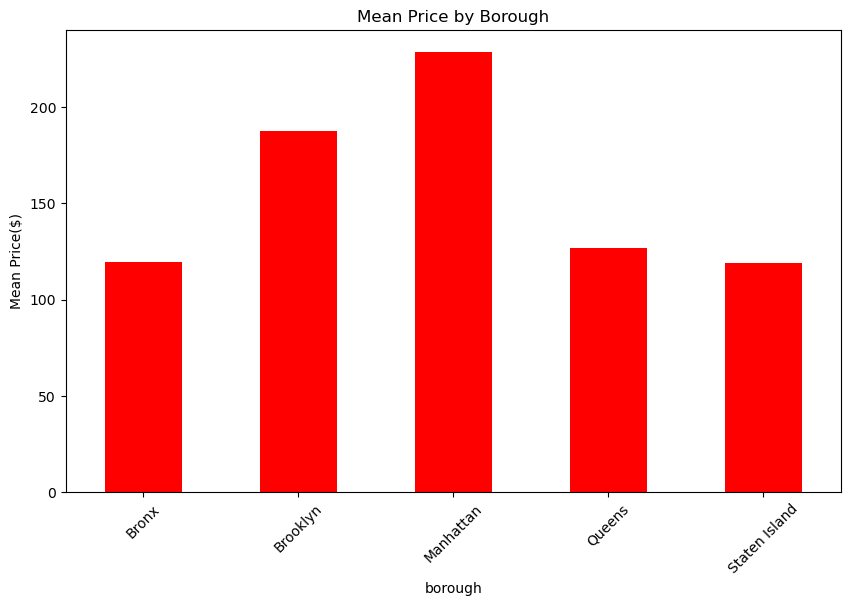

<Figure size 640x480 with 0 Axes>

In [25]:
#MEAN PRICE BAR
plt.figure(figsize=(10, 6))
summary_stats['mean'].plot(kind='bar', color='red')
plt.title('Mean Price by Borough')
plt.xlabel('borough')
plt.ylabel('Mean Price($)')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig(fname="Mean Price by Neighborhood Group.png", transparent=True) 

In [26]:

filtered_df = airbnb_df[airbnb_df['price'] <= 3000]


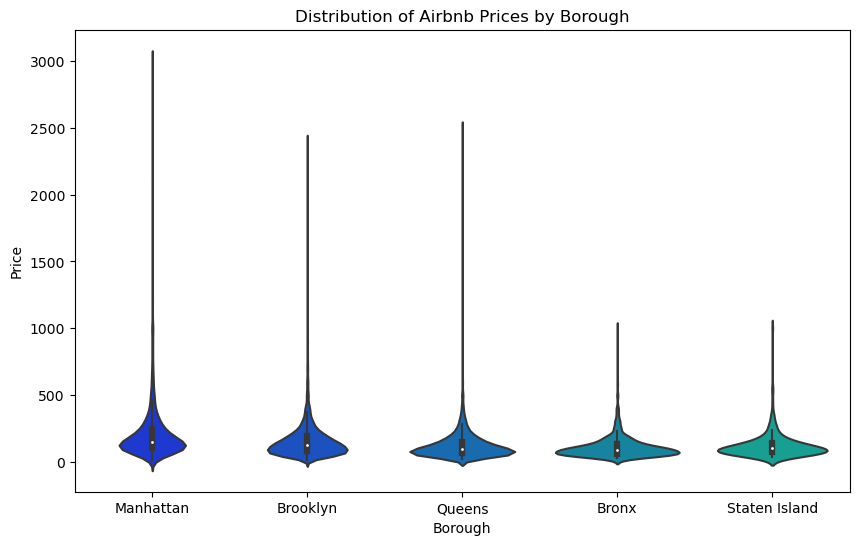

<Figure size 640x480 with 0 Axes>

In [27]:
#PRICES VIOLIN CHART 
import seaborn as sns
import matplotlib.pyplot as plt
winter_palette = sns.color_palette("winter")
#custom_palette = ["#BA55D3", "#FF6347", "#4682B4", "#32CD32", "#FFD700"]
plt.figure(figsize=(10, 6))
sns.violinplot(x='neighborhood_group', y='price', data=filtered_df, palette=winter_palette)
plt.title('Distribution of Airbnb Prices by Borough')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()
plt.savefig(fname="Dist_of_prices_violin.png", transparent=True) 


In [28]:
# Extract prices for each borough
borough_prices = []
for neighborhood_group, group_df in filtered_df.groupby('neighborhood_group'):
    borough_prices.append(group_df['price'])
borough_prices

[21        82
 91        45
 112      151
 154      119
 174      109
         ... 
 19938     90
 19993     60
 20024    100
 20052     59
 20077     65
 Name: price, Length: 917, dtype: int64,
 4         71
 5         88
 6        105
 7        146
 16       170
         ... 
 20139    200
 20140    350
 20142    150
 20145    221
 20146    125
 Name: price, Length: 7481, dtype: int64,
 0        185
 1        145
 2        153
 3         60
 8         60
         ... 
 20138    500
 20141    375
 20144    300
 20147    100
 20148    100
 Name: price, Length: 7797, dtype: int64,
 9        130
 11        95
 13       100
 14        87
 19       149
         ... 
 20117     99
 20122    100
 20125     49
 20133     90
 20143     70
 Name: price, Length: 3647, dtype: int64,
 84        65
 199      103
 273       87
 288       55
 362       49
         ... 
 19733     72
 19781     70
 19902     68
 19949    100
 20026     76
 Name: price, Length: 285, dtype: int64]

In [29]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(*borough_prices)

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation of results
if p_value < 0.05:
    print("Reject null hypothesis: There are significant differences in prices among boroughs.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in prices among boroughs.")

F-statistic: 243.37069513943297
p-value: 1.7094423925233237e-204
Reject null hypothesis: There are significant differences in prices among boroughs.


NUMBER OF BEDROOMS ANALYSIS BELOW

In [30]:
room_types = airbnb_df['num_bedrooms'].unique()
room_types

array([ 1,  2,  3,  4,  5,  8,  6,  7,  9, 14, 15])

In [31]:
# Get unique values of 'num_bedrooms' column
number_bedrooms = airbnb_df['num_bedrooms'].unique()
# Count the occurrences of each number of bedrooms
bedroom_counts = airbnb_df['num_bedrooms'].value_counts()
# Create DataFrame from unique room types
#df_number_bedrooms = pd.DataFrame({'Room Types': number_bedrooms})
# Create DataFrame from counts
df_number_bedrooms = pd.DataFrame({'Room Types': bedroom_counts.index, 'Count': bedroom_counts.values})

# Print the DataFrame
print(df_number_bedrooms)

    Room Types  Count
0            1  14737
1            2   3545
2            3   1371
3            4    338
4            5    108
5            6     28
6            7      9
7            9      6
8            8      5
9           14      1
10          15      1


In [32]:
room_data = {
    'room_type': ['1 room', '2 rooms', '3 rooms', '4 rooms','5 or more rooms'],
    'count': [14737, 3545, 1371, 338, 158]
}
df = pd.DataFrame(room_data)
df

,room_type,count
0,1 room,14737
1,2 rooms,3545
2,3 rooms,1371
3,4 rooms,338
4,5 or more rooms,158


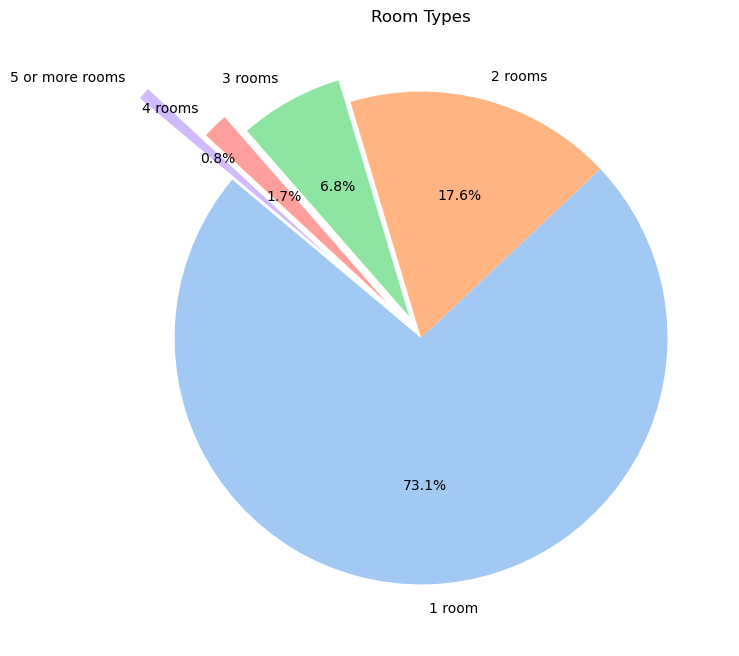

<Figure size 640x480 with 0 Axes>

In [33]:
explode = (0, 0, .1, .2, 0.5)
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['room_type'], explode=explode, autopct='%1.1f%%', startangle=140,  colors=sns.color_palette("pastel"))
plt.title('Room Types')
plt.show()
plt.savefig(fname=" room_type_pie.png", transparent=True)

In [34]:
summary_stats = airbnb_df.groupby('neighborhood_group')['num_bedrooms'].describe()
print(summary_stats)

                     count      mean       std  min  25%  50%  75%   max
neighborhood_group                                                      
Bronx                918.0  1.335512  0.705688  1.0  1.0  1.0  1.0   6.0
Brooklyn            7488.0  1.465545  0.855619  1.0  1.0  1.0  2.0  14.0
Manhattan           7810.0  1.341869  0.738354  1.0  1.0  1.0  1.0  15.0
Queens              3648.0  1.391996  0.762690  1.0  1.0  1.0  2.0   7.0
Staten Island        285.0  1.501754  0.898452  1.0  1.0  1.0  2.0   6.0


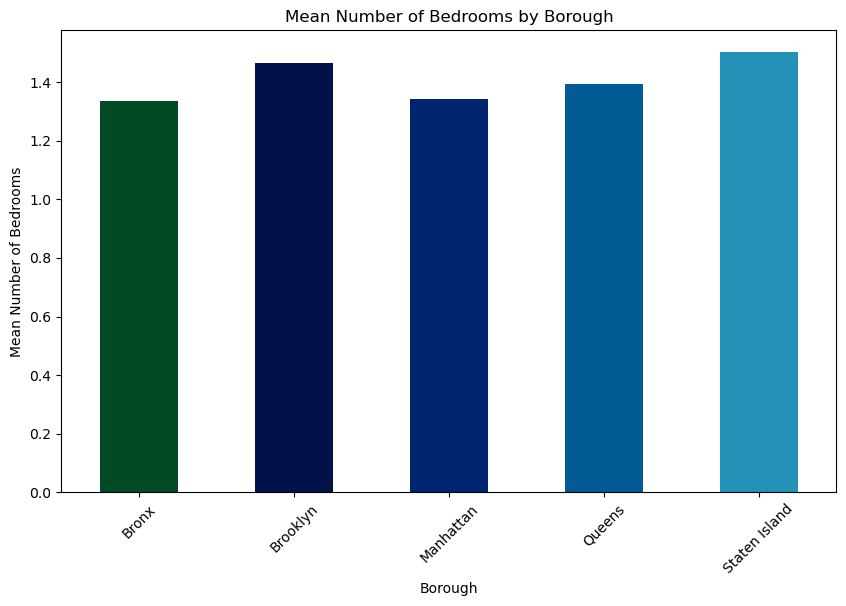

In [35]:
#NUM BEDROOM BAR
# Group by Borough and Calculate Mean
mean_num_bedrooms_by_borough = airbnb_df.groupby('neighborhood_group')['num_bedrooms'].mean()

# Plotting
mean_num_bedrooms_by_borough.plot(kind='bar', color=sns.color_palette("ocean"), figsize=(10, 6))

# Adding Title and Labels
plt.title('Mean Number of Bedrooms by Borough')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.ylabel('Mean Number of Bedrooms')
plt.savefig(fname="mean_num_beds_bar.png", transparent=True)

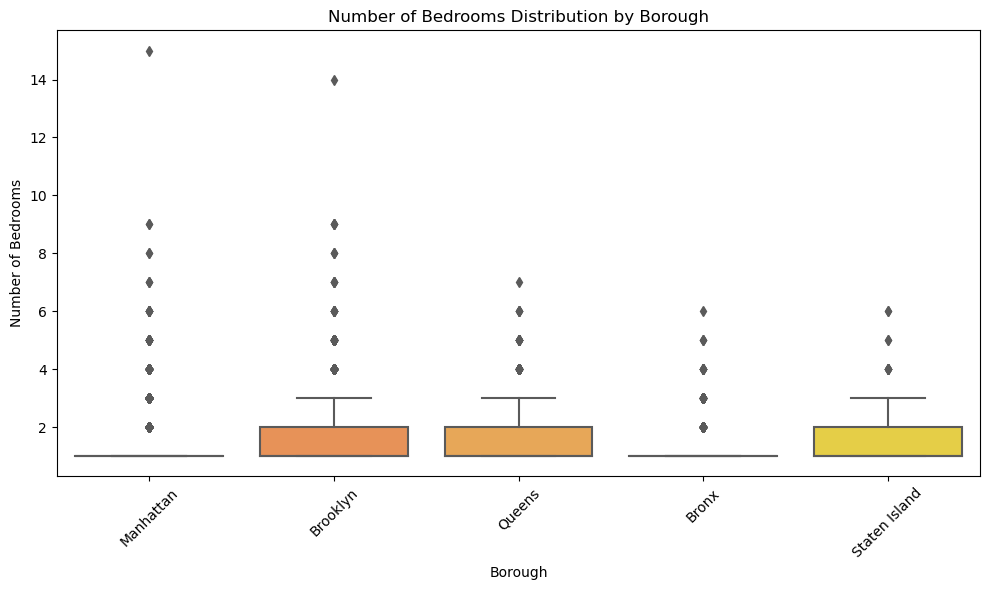

<Figure size 640x480 with 0 Axes>

In [36]:
#NUM BEDROOM HISTOGRAM
# Define custom sunset palette
sunset_palette = ["#FF6F61", "#FF8E40", "#FFA940", "#FFC13B", "#FFE02D"]

# Create a box plot with the custom sunset palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighborhood_group', y='num_bedrooms', data=airbnb_df, palette=sunset_palette)

# Adding Title and Labels
plt.title('Number of Bedrooms Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Bedrooms')

# Show Plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
plt.savefig(fname="Dist_of_rooms hist.png", transparent=True)

In [37]:
# Extract number of bedrooms for each borough
borough_bedrooms = []
for neighborhood_group, group_df in filtered_df.groupby('neighborhood_group'):
    borough_bedrooms.append(group_df['num_bedrooms'])
borough_bedrooms


[21       1
 91       1
 112      2
 154      1
 174      1
         ..
 19938    1
 19993    1
 20024    2
 20052    1
 20077    1
 Name: num_bedrooms, Length: 917, dtype: int64,
 4        1
 5        1
 6        1
 7        1
 16       1
         ..
 20139    1
 20140    2
 20142    1
 20145    1
 20146    1
 Name: num_bedrooms, Length: 7481, dtype: int64,
 0        1
 1        1
 2        1
 3        1
 8        1
         ..
 20138    1
 20141    1
 20144    1
 20147    1
 20148    1
 Name: num_bedrooms, Length: 7797, dtype: int64,
 9        1
 11       2
 13       1
 14       1
 19       1
         ..
 20117    1
 20122    1
 20125    1
 20133    1
 20143    1
 Name: num_bedrooms, Length: 3647, dtype: int64,
 84       1
 199      1
 273      1
 288      1
 362      1
         ..
 19733    1
 19781    2
 19902    1
 19949    1
 20026    1
 Name: num_bedrooms, Length: 285, dtype: int64]

In [38]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(*borough_bedrooms)

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation of results
if p_value < 0.05:
    print("Reject null hypothesis: There are significant differences in number of bedrooms among boroughs.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in number of bedrooms among boroughs.")


F-statistic: 26.384755782735148
p-value: 7.424893133755032e-22
Reject null hypothesis: There are significant differences in number of bedrooms among boroughs.
